# Aprendizagem Automática Avançada
## TP2 - Exercise 2
João Romão - 55760,
Pedro França - 55848

In [1]:
import numpy as np
from neupy import algorithms

#to hide a warning message related to neupy
import warnings
warnings.filterwarnings('ignore')

C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (

### 1.1 Defining the patterns

As a first step in this problem, we will use the same function presented in the exameple for representing the images we define in our matrices, using asterisks (\*) instead of ones (1).
As for our images, we chose to represent the letter 'C', an arrow pointing up ('↑'), and the number '4', which can also be observed using the draw_bin_image function.

In [2]:
def draw_bin_image(image_matrix):
    for row in image_matrix.tolist():
        print('| ' + ' '.join(' *'[val] for val in row))

In [3]:
c = np.matrix([
    0, 1, 1, 1, 0,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 0,
    1, 0, 0, 0, 0,
    1, 0, 0, 0, 1,
    0, 1, 1, 1, 0
    ])

arrow = np.matrix([
    0, 0, 1, 0, 0,
    0, 1, 1, 1, 0,
    1, 0, 1, 0, 1,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0
    ])

four = np.matrix([
    0, 0, 0, 1, 0,
    0, 0, 1, 1, 0,
    0, 1, 0, 1, 0,
    1, 1, 1, 1, 1,
    0, 0, 0, 1, 0,
    0, 0, 0, 1, 0,
    ])

In [4]:
draw_bin_image(c.reshape((6, 5)))
print('\n')
draw_bin_image(arrow.reshape((6, 5)))
print('\n')
draw_bin_image(four.reshape((6, 5)))

|   * * *  
| *       *
| *        
| *        
| *       *
|   * * *  


|     *    
|   * * *  
| *   *   *
|     *    
|     *    
|     *    


|       *  
|     * *  
|   *   *  
| * * * * *
|       *  
|       *  


### 1.2 Training the Network

Next, we used these patterns to train a Discrete Hopfield Network, so it is able to recognize and reconstitute them from partial or shuffled variations that are used as input. Just as in the example, we trained our network using a **synchronous** pattern recovery mode (mode = 'sync'). This will not affect the training step, but will impact the retrieval of the patterns for memory in the next sections. For this reason, it can be changed at any time after training.

For a general understanding, synchronous mode allows recall of memories from a given input (can be a broken or suffled pattern in this exercise) by multiplying all the neurons of said input with the Weight Matrix obtained through training, generating an output that will, hopefully, be the one of the patterns the model was trained on. In the asynchronous mode, neurons are updated one at a time, with the new output serving as the input for the next iterations (delayed feedback), for a n_number of iterations. This allows the output to sequentially approach a know memory. The advantages and disadvantages of each recall mode will be discussed at the end of this report, as we find it is more effective to interpret our results in this manner. So, for now, we will start by using the synchronous mode, as it is more simple.

In [5]:
data = np.concatenate([c, arrow, four], axis=0)

dhnet = algorithms.DiscreteHopfieldNetwork(mode='sync')
dhnet.train(data)

### 1.3. Broken patterns

### 1.3.1 Broken pattern creation

For the broken patterns, we removed four "ones" from each of our patterns, so they would not be recognizable. In other words, the patterns bellow are our new inputs that will be predicted using our trained net.

In [6]:
c_broken = np.matrix([
    0, 1, 1, 1, 0,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    1, 0, 0, 0, 0,
    1, 0, 0, 0, 1,
    0, 1, 0, 1, 0
    ])

arrow_broken = np.matrix([
    0, 0, 0, 0, 0,
    0, 1, 1, 0, 0,
    0, 0, 1, 0, 1,
    0, 0, 1, 0, 0,
    0, 0, 0, 0, 0,
    0, 0, 1, 0, 0
    ])

four_broken = np.matrix([
    0, 0, 0, 0, 0,
    0, 0, 1, 1, 0,
    0, 1, 0, 1, 0,
    1, 1, 0, 0, 1,
    0, 0, 0, 1, 0,
    0, 0, 0, 0, 0,
    ])

In [7]:
draw_bin_image(c_broken.reshape((6, 5)))
print('\n')
draw_bin_image(arrow_broken.reshape((6, 5)))
print('\n')
draw_bin_image(four_broken.reshape((6, 5)))

|   * * *  
|          
|          
| *        
| *       *
|   *   *  


|          
|   * *    
|     *   *
|     *    
|          
|     *    


|          
|     * *  
|   *   *  
| * *     *
|       *  
|          


### 1.3.2 Broken pattern prediction (synchronous)

We used our trained network to predict the original patterns from memory. All three input patterns were successfully recovered, as displayed bellow:

In [8]:
result = dhnet.predict(c_broken)
draw_bin_image(result.reshape((6, 5)))

|   * * *  
| *       *
| *        
| *        
| *       *
|   * * *  


In [9]:
result = dhnet.predict(arrow_broken)
draw_bin_image(result.reshape((6, 5)))

|     *    
|   * * *  
| *   *   *
|     *    
|     *    
|     *    


In [10]:
result = dhnet.predict(four_broken)
draw_bin_image(result.reshape((6, 5)))

|       *  
|     * *  
|   *   *  
| * * * * *
|       *  
|       *  


### 1.4 Suffled patterns

### 1.4.1 Shuffled pattern creation

For the second part of the exercise, we tested if the network was able to recall a suffled version of the patterns, where four "ones" were moved from their original positions in the input matrix.

In [11]:
c_shuffle = np.matrix([
    0, 1, 1, 1, 0,
    0, 0, 1, 0, 0,
    0, 1, 0, 0, 1,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    0, 1, 0, 1, 0
    ])

arrow_shuffle = np.matrix([
    0, 0, 0, 0, 0,
    0, 1, 1, 0, 0,
    0, 0, 1, 0, 1,
    0, 0, 1, 1, 1,
    1, 1, 0, 0, 0,
    0, 0, 1, 0, 0
    ])

four_shuffle = np.matrix([
    0, 0, 0, 0, 1,
    0, 0, 1, 1, 1,
    0, 1, 0, 1, 0,
    1, 1, 0, 0, 1,
    1, 0, 0, 1, 0,
    1, 0, 0, 0, 0,
    ])

In [12]:
draw_bin_image(c_shuffle.reshape((6, 5)))
print('\n')
draw_bin_image(arrow_shuffle.reshape((6, 5)))
print('\n')
draw_bin_image(four_shuffle.reshape((6, 5)))

|   * * *  
|     *    
|   *     *
| *       *
| *       *
|   *   *  


|          
|   * *    
|     *   *
|     * * *
| * *      
|     *    


|         *
|     * * *
|   *   *  
| * *     *
| *     *  
| *        


### 1.4.2 Shuffled pattern prediction

The network successfully recalled the 'C' and 'arrow' 

In [13]:
result = dhnet.predict(c_shuffle)
draw_bin_image(result.reshape((6, 5)))

|   * * *  
| *       *
| *        
| *        
| *       *
|   * * *  


In [14]:
result = dhnet.predict(arrow_shuffle)
draw_bin_image(result.reshape((6, 5)))

|     *    
|   * * *  
| *   *   *
|     *    
|     *    
|     *    


It was not successful in recovering the '4' pattern, which was returned with some additional noise. Unlike what was verified in the example exercise, we cannot affirm with certainty that this patterns results from the combination of the '4' pattern with one or both of the other two.

In [15]:
result = dhnet.predict(four_shuffle)
draw_bin_image(result.reshape((6, 5)))

| *     *  
|     * *  
|   *   *  
| * * * * *
|   *   *  
|       * *


Following the directions provided in the example, we will experiment with an **assynchronous** approach, by adjusting the mode of the network accordingly. This produced better results comparatively to the synchronous mode, effectively recalling the '4' pattern.

In [16]:
from neupy import utils
utils.reproducible()

dhnet.mode = 'async'
dhnet.n_times = 400

result = dhnet.predict(four_shuffle)
draw_bin_image(result.reshape((6, 5)))

|       *  
|     * *  
|   *   *  
| * * * * *
|       *  
|       *  


### 1.5 Hinton diagram

The Hinton diagram is the representation of the Weight Matrix, with white and black squares representing positive and negative values, respectively. Since the weight matrix is depentend on the number of patterns we are using to train in (i.e., the patterns it memorizes), it's values can vary between m and -m, where m is the number of patterns. In the diagram bellow, we can see big and smaller squares, that represent the magnitude of the value. Therefore, the bigger the square, the closer to m or -m, and the smalled the square, the closer to 0. We will interpret this diagram in more detail in our final remarks.

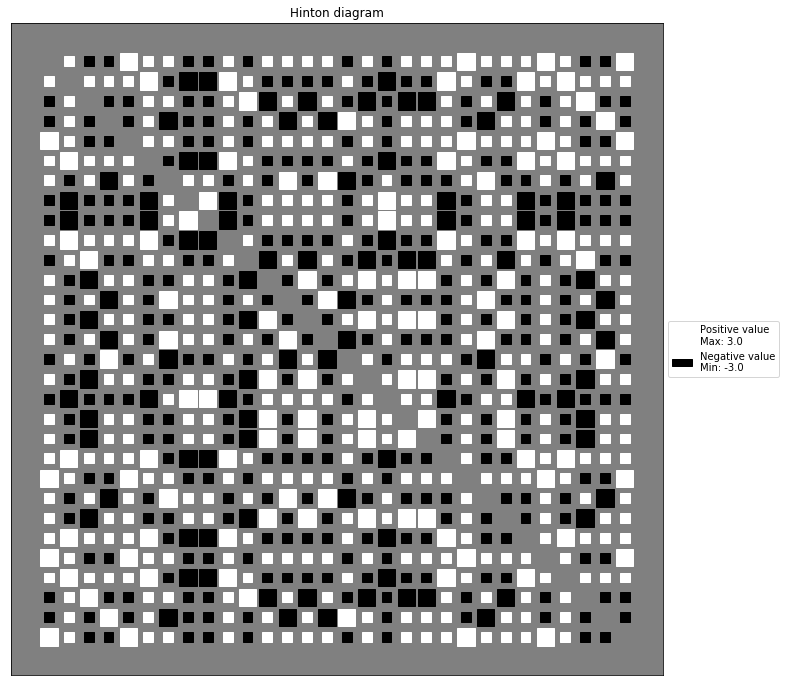

In [17]:
from neupy import plots
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
plt.title("Hinton diagram")
plots.hinton(dhnet.weight)
plt.show()

###  2.1 Adding more patterns

We draw two more images using asterisks to represent the sigma(Σ) and omega(Ω) symbols. This new paterns can be observed once again using the draw_bin_image function. The goal of this is to see the performance of the net dealing with more paterns and observing if it keeps its accuracy.

In [18]:
sigma = np.matrix([
    1, 1, 1, 1, 1,
    0, 1, 0, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 1, 0, 0, 0,
    1, 1, 1, 1, 1
    ])

omega = np.matrix([
    0, 1, 1, 1, 0,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    0, 1, 0, 1, 0,
    1, 1, 0, 1, 1
    ])

In [19]:
draw_bin_image(sigma.reshape((6, 5)))
print('\n')
draw_bin_image(omega.reshape((6, 5)))

| * * * * *
|   *      
|     *    
|     *    
|   *      
| * * * * *


|   * * *  
| *       *
| *       *
| *       *
|   *   *  
| * *   * *


### 2.2 Training the network with  2 new paterns (synchronous)

We followed the same workflow with the 2 new paterns starting it by training the new model and then testing it to observe the results. Just as before, we will set 'sync' as our initial mode.

In [20]:
data = np.concatenate([c, arrow, four, sigma, omega], axis=0)

dhnet = algorithms.DiscreteHopfieldNetwork(mode='sync')
dhnet.train(data)

### 2.3 Recalling broken and shuffled patterns

###  2.3.1 Broken and shuffled patterns creation

Once again, we changed the "ones" of our images to see if the model can predict the boken patterns.

In [21]:
#broken patterns
sigma_broken = np.matrix([
    1, 1, 1, 1, 1,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 0, 1, 0, 0,
    0, 1, 0, 0, 0,
    0, 1, 0, 1, 1
    ])

omega_broken = np.matrix([
    0, 1, 1, 1, 0,
    1, 0, 0, 0, 0,
    1, 0, 0, 0, 0,
    1, 0, 0, 0, 1,
    0, 1, 0, 1, 0,
    0, 0, 0, 1, 1
    ])

#shuffled patterns
sigma_shuffle = np.matrix([
    1, 1, 1, 1, 1,
    0, 0, 0, 0, 1,
    0, 0, 0, 1, 0,
    1, 0, 1, 0, 0,
    0, 1, 0, 0, 1,
    0, 1, 0, 1, 1
    ])

omega_shuffle = np.matrix([
    0, 1, 1, 1, 0,
    1, 0, 0, 0, 0,
    1, 0, 0, 1, 0,
    1, 0, 1, 0, 1,
    1, 1, 0, 1, 1,
    0, 0, 0, 1, 1
    ])

In [22]:
print('Broken sigma and omega')
print('\n')
draw_bin_image(sigma_broken.reshape((6, 5)))
print('\n')
draw_bin_image(omega_broken.reshape((6, 5)))
print('\n')
print('Shuffled sigma and omega')
print('\n')
draw_bin_image(sigma_shuffle.reshape((6, 5)))
print('\n')
draw_bin_image(omega_shuffle.reshape((6, 5)))

Broken sigma and omega


| * * * * *
|          
|          
|     *    
|   *      
|   *   * *


|   * * *  
| *        
| *        
| *       *
|   *   *  
|       * *


Shuffled sigma and omega


| * * * * *
|         *
|       *  
| *   *    
|   *     *
|   *   * *


|   * * *  
| *        
| *     *  
| *   *   *
| * *   * *
|       * *


### 2.3.2 Broken pattern prediction (synchronous)

Is possible to see that with more patterns the model has an increased difficulty to predict the correct patterns.

In [23]:
result = dhnet.predict(c_broken)
draw_bin_image(result.reshape((6, 5)))
print('\n')
result = dhnet.predict(arrow_broken)
draw_bin_image(result.reshape((6, 5)))
print('\n')
result = dhnet.predict(four_broken)
draw_bin_image(result.reshape((6, 5)))
print('\n')
result = dhnet.predict(sigma_broken)
draw_bin_image(result.reshape((6, 5)))
print('\n')
result = dhnet.predict(omega_broken)
draw_bin_image(result.reshape((6, 5)))

|   * * *  
| *       *
| *        
| *        
| *       *
|   * * *  


|     *    
|   * * *  
| *   *   *
|     *    
|     *    
|     *    


|       *  
|     * *  
|   *   * *
| * * * * *
|     * *  
|       *  


| * * * * *
| * *     *
|     *    
|          
|   *      
| * * * * *


|   * * *  
| *       *
| *       *
| *       *
|   *   *  
| * *   * *


### 2.3.2 Shuffled patterns prediction (synchronous)

The same happened on the shuffled pattern inputs, with more patterns it is harder to predict the original pattern.

In [24]:
result = dhnet.predict(c_shuffle)
draw_bin_image(result.reshape((6, 5)))
print('\n')
result = dhnet.predict(arrow_shuffle)
draw_bin_image(result.reshape((6, 5)))
print('\n')
result = dhnet.predict(four_shuffle)
draw_bin_image(result.reshape((6, 5)))
print('\n')
result = dhnet.predict(sigma_shuffle)
draw_bin_image(result.reshape((6, 5)))
print('\n')
result = dhnet.predict(omega_shuffle)
draw_bin_image(result.reshape((6, 5)))

|   * * *  
| *       *
| *        
| *        
|       *  
|   * * *  


| *   *   *
|   * * *  
| * * * * *
|   * *    
|     *    
|     *    


|       *  
| *   * *  
|   *   * *
| * * * * *
|     * * *
|       *  


| * * * * *
| *       *
| *        
| *        
| * *      
| * * * * *


|   * * *  
| *       *
| *        
| *       *
|   *   *  
| * *   * *


### 2.5 Changing recall to asynchronous mode 

With the previous results being not so  satisfactory we decided to change the recall mode to asynchronous and compare the results. The results did not change when using 1000 iterations, so we left the same number of iterations used for the first exercise.

In [25]:
dhnet.mode = 'async'
dhnet.n_times = 400

### 2.5.1 Remembering broken patterns - Patern prediction (asynchronous)

In [26]:
result = dhnet.predict(c_broken)
draw_bin_image(result.reshape((6, 5)))
print('\n')
result = dhnet.predict(arrow_broken)
draw_bin_image(result.reshape((6, 5)))
print('\n')
result = dhnet.predict(four_broken)
draw_bin_image(result.reshape((6, 5)))
print('\n')
result = dhnet.predict(sigma_broken)
draw_bin_image(result.reshape((6, 5)))
print('\n')
result = dhnet.predict(omega_broken)
draw_bin_image(result.reshape((6, 5)))

|   * * *  
| *       *
| *        
| *        
| *       *
|   * * *  


|     *    
|   * * *  
| *   *   *
|     *    
|     *    
|     *    


|          
|     * *  
|   *   * *
| * * * * *
|     * *  
|          


|   * * *  
| *       *
| *        
| *        
| * *     *
| * * * * *


|   * * *  
| *       *
| *       *
| *       *
|   *   *  
| * *   * *


### 2.5.2 Remembering shuffled patterns - Patern prediction (asynchronous)

In [27]:
result = dhnet.predict(c_shuffle)
draw_bin_image(result.reshape((6, 5)))
print('\n')
result = dhnet.predict(arrow_shuffle)
draw_bin_image(result.reshape((6, 5)))
print('\n')
result = dhnet.predict(four_shuffle)
draw_bin_image(result.reshape((6, 5)))
print('\n')
result = dhnet.predict(sigma_shuffle)
draw_bin_image(result.reshape((6, 5)))
print('\n')
result = dhnet.predict(omega_shuffle)
draw_bin_image(result.reshape((6, 5)))

|   * * *  
| *       *
| *        
| *        
| * *     *
| * * * * *


| *       *
|   * * *  
|   * * *  
|   * * *  
|     *    
|     *    


|          
|     * *  
|   *   *  
| * * * * *
| *   * * *
|          


|   * * *  
| *       *
| *       *
| *       *
|   *   *  
| * *   * *


|   * * *  
| *       *
| *       *
| *       *
|   *   *  
| * *   * *


Once more, we can observe that recalling is still not accurate and this can be attributed to the number of patterns we store in our matrix. We can also observe some changes in the new Hinton diagram bellow, which we will discuss in more depth in the final remarks, in an effort to understand this decrease of recall performance.

### 2.5 Hinton diagram

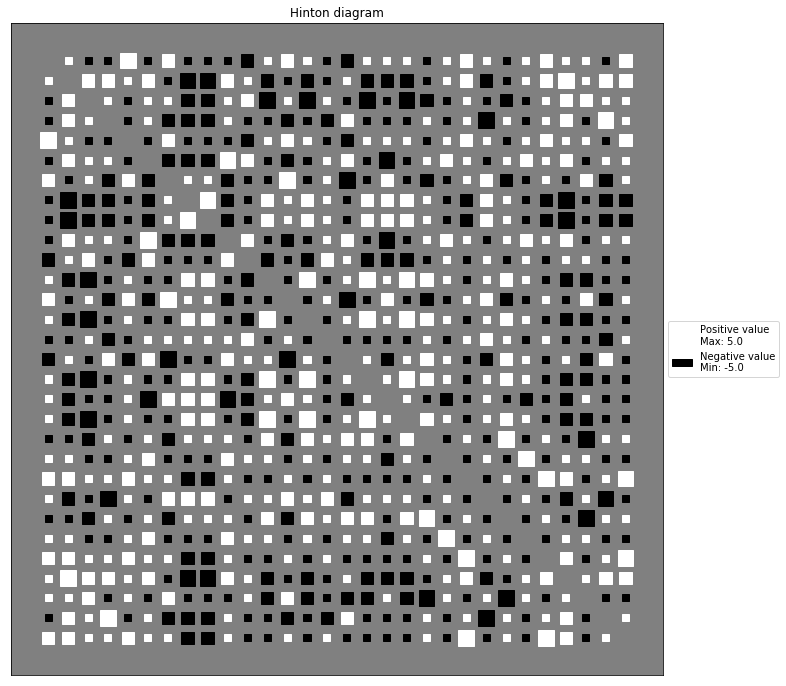

In [28]:
plt.figure(figsize=(14, 12))
plt.title("Hinton diagram")
plots.hinton(dhnet.weight)
plt.show()

### 3. Final Remarks

Due to the nature of these exercises, we decided it would be best to present all the results first and save the interpretation and conclusions for the end, as comparing the different results is crucial to understanding Hopfield Networks.

Starting with the first exercise, we saw that recalling was more accurate when performed on asynchronous mode, since in this mode the input neurons are iteratively being updated by multiplication with the Weight Matrix during a number of iterations (400 in our exercise), until the output converges into a known pattern which the model has been trained on (this is not always the case and we will explain why in the next paragraph). This means that the input is constantly being updated one neuron at a time and, theoretically, becoming increasingly similar to a known pattern. In the synchronous mode, however all neurons are multiplied by the matrix at the same time to generate an output, which may not resemble any pattern used for training. We could observed that with the ‘4’ shuffled pattern in the first part of the exercise, which was only successfully recalled in asynchronous mode.

In the second exercise, we observed the network had problems in recalling the in-memory patterns both in synchronous and asynchronous mode (we used 400 iterations for the latter but we tried with 1000 and reached similar results). Before we proceed to interpretation of our results, it’s important so assess the memory limit of our network. According to the formula provided in the NeuPy web page, this limit (m) is calculated based on the number of features (n) that each input has. Since n = 30 (number of neurons), m = n /[2.log(n)] ≈ 3. This means that the storage of 5 different patterns might be pushing the limit of the recall capabilities of our network. Other factors also come into play in the recall capacity such as the similarity of patterns and the modified version of the memory (broken and shuffled) we give as input. If this modified version resembles an intermediary state of 2 or more training patterns, then the recall might be corrupted and the model may return a pattern that it has never seen (hallucination), since that still satisfies the minimum energy condition. However, this is not a true minimum of the energy function corresponding to known patterns, but instead it corresponds to the minimum located in the intermediary “sadle” of the energy plane (for reference, see the plot in http://neupy.com/2015/09/20/discrete_hopfield_network.html#hallucinations ). The more patterns we have stored in memory in the m-dimensional space, the more “sadles” are created, meaning more intermediary states of local minimal energy are possible and hence more erroneous patterns. 

We can also observe that the Hinton diagram (a representation of the Weight Matrix) presents a higher percentage of high-magnitude values in the Hinton diagram when storing only 3 patterns, comparatively to the one storing 5 patterns. This can be observed by the higher number of large squares in the former and higher number of smaller squares in the latter, implying the Weight Matrix storing the five patterns is less stable, which we can confirm by looking at our recall results in both scenarios: in the scenario where 5 patterns were stored, the lower stability of the Hinton diagram results in more inaccurate recalling, even when in asynchronous mode. Greater values (whether positive or negative) increase stability since it means that when the Weight Matrix is multiplied by an input vector, the output neurons are less likely to oscillate (for the lack of a better word) between positive and negative states, which can greatly impact the retrieval both in synchronous and asynchronous mode. We also noticed the existence of similar columns in the Hinton diagrams, such as described in the NeuPy website but we find these reveal more about the patterns themselves than matrix stability, so we chose to focus on the latter aspect in this discussion, as we find it to be more relevant.